In [4]:
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path


In [5]:
import utils as util
from sentiment_analysis import apply_sentiment_analysis
from text_processing import process_headlines, count_tokens
from visualization import plot_sentiment_distribution, plot_common_keywords, plot_common_bigrams


In [6]:
# Load the dataset
all_data_path = '../data/raw_analyst_ratings.csv'
data = util.read_csv_file(all_data_path)
df = data.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
# Apply sentiment analysis to the headlines
df = apply_sentiment_analysis(df)

In [8]:
# Display sentiment counts
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
sentiment
Neutral     934914
Positive    341178
Negative    131236
Name: count, dtype: int64


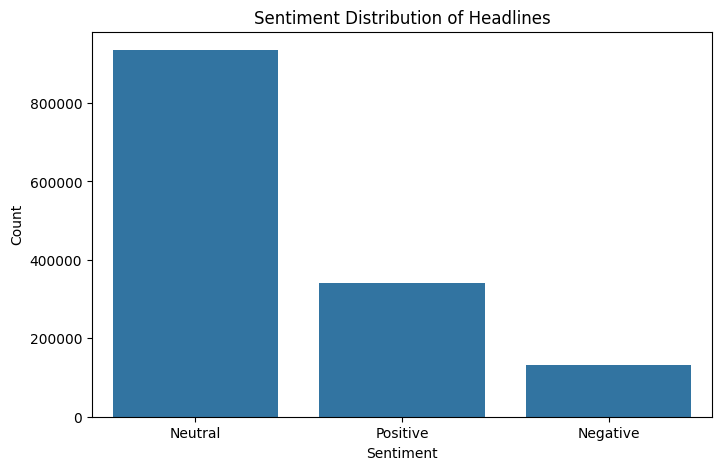

In [9]:
# Plot sentiment distribution
plot_sentiment_distribution(sentiment_counts)

In [10]:
# Process the headlines and count token frequencies
all_tokens = process_headlines(df['headline'])
token_counts = count_tokens(all_tokens)

In [12]:
# Display the most common keywords
common_keywords = token_counts.most_common(20)
print("\nMost Common Keywords:")
for keyword, count in common_keywords:
    print(f"{keyword}: {count}")


Most Common Keywords:
stocks: 161702
vs: 138835
eps: 128801
est: 122289
shares: 114140
reports: 108688
update: 91645
market: 91080
earnings: 87183
sales: 79528
top: 78493
benzinga: 74466
pt: 73059
announces: 66531
price: 64217
buy: 63928
downgrades: 61942
trading: 61146
raises: 57793
upgrades: 56802


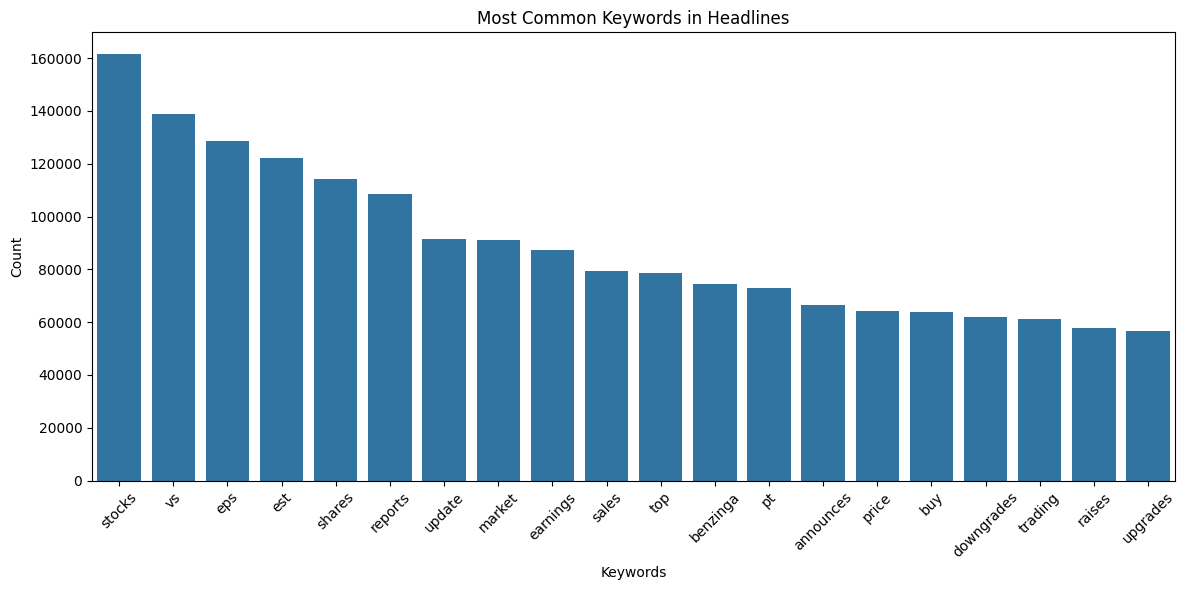

In [13]:
# Plot the most common keywords
plot_common_keywords(common_keywords)


In [16]:
# Create bigrams and count their frequencies
from collections import Counter
from nltk import ngrams
bigram_counts = Counter(ngrams(all_tokens, 2))



In [18]:
# Display the most common bigrams
common_bigrams = bigram_counts.most_common(10)
print("\nMost Common Bigrams:")
for bigram, count in common_bigrams:
    print(f"{' '.join(bigram)}: {count}")


Most Common Bigrams:
vs est: 93818
eps vs: 58410
price target: 47264
benzinga top: 44259
stocks moving: 40038
market update: 33159
earnings scheduled: 32054
initiates coverage: 28981
raises pt: 27264
shares several: 24078


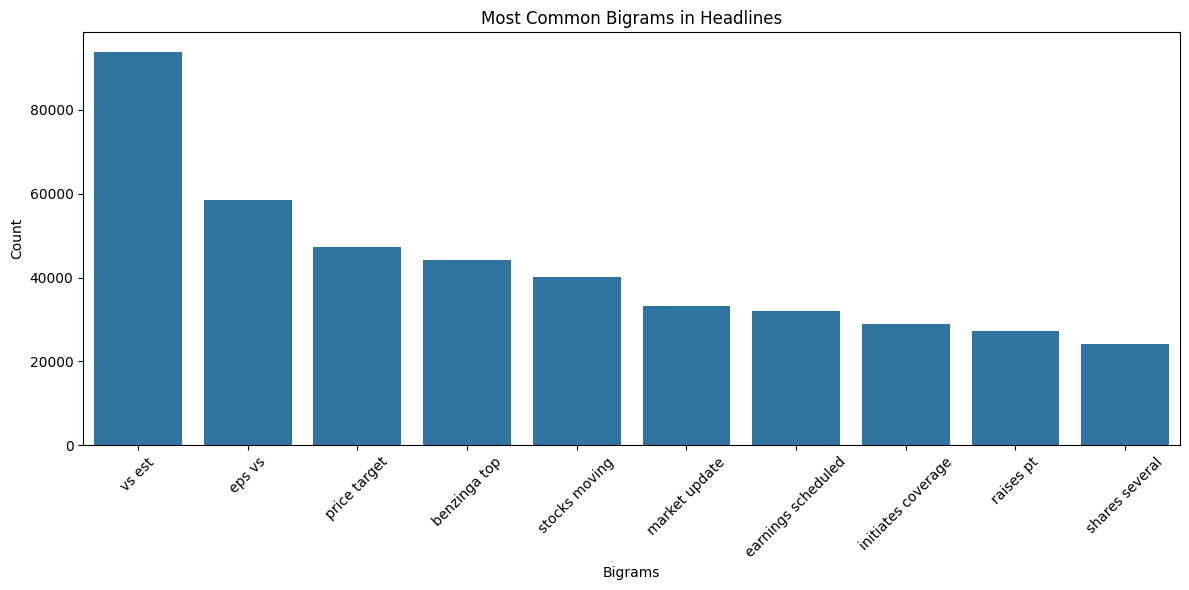

In [19]:
# Plot the most common bigrams
plot_common_bigrams(common_bigrams)